In [89]:
import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd
import mxnet as mx
from mxnet import nd
from mxnet import autograd
from mxnet import init
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon import data as gluon_data
from mxnet.gluon import loss as gluon_loss
from PIL import Image
from tqdm import tqdm
from IPython.display import display 
from matplotlib.pyplot import imshow

In [2]:
ctx = mx.cpu()
data = pd.read_csv("Data/data.csv")
train_data = data.sample(frac=0.98, random_state=200)
test_data = data.drop(train_data.index)
train_labels = nd.array(train_data.iloc[:,0])
train_features = nd.array(train_data.iloc[:,1:785]) 
test_labels = nd.array(test_data.iloc[:,0])
test_features = nd.array(test_data.iloc[:,1:785])

In [3]:
batch_size = 256
dataset = gluon.data.ArrayDataset(train_features,train_labels)
train_iter = gluon.data.DataLoader(dataset,batch_size,shuffle=True)

In [4]:
net = nn.Sequential()
net.add(nn.Dense(784,activation='relu'))
net.add(nn.Dense(392,activation='relu'))
net.add(nn.Dense(196,activation='relu'))
net.add(nn.Dense(98,activation='relu'))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [5]:
loss_function = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate' : 0.1} )

In [6]:
num_epochs = 5
for epoch in range(1,num_epochs+1):
    for data,label in train_iter:
        with autograd.record():
            y_hat = net(data)
            loss_value = loss_function(y_hat,label).sum()

        loss_value.backward()
        trainer.step(batch_size)

In [7]:
accuracy = 0
results = net(test_features)
for i in range(test_labels.shape[0]):       
        if test_labels[i].asnumpy()[0] == results[i].asnumpy().argmax():
            accuracy += 1
            
print("Net accuracy: ",100*(accuracy/test_labels.shape[0]),"%")

Net accuracy:  97.61904761904762 %


2


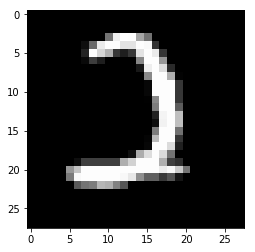

In [100]:
index = 2

print(results[index].asnumpy().argmax())
img_data = test_features[index].reshape(28,28)
img = Image.fromarray(img_data.asnumpy())
imshow(img)

112